INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


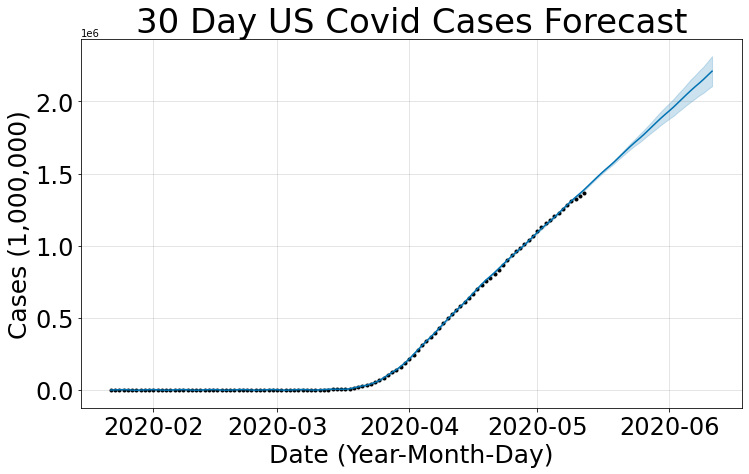

In [5]:
import csv
import pandas as pd
import numpy
from fbprophet import Prophet

# Gets all cases in world by country and date.
full_set = pd.read_csv('./data_sets/time_series_covid19_confirmed_US.csv')

# Gets all cases in US by country and date.
us_set = full_set[full_set['iso3'].str.contains("USA")]

# Create Table with Total Cases and Date for US.

# Removes all columns that are not dates.
only_date_cases_us_set = us_set.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], axis=1)
# Transforms dataset to have date as first column, with cases as remaining columns.
only_date_cases_us_set = only_date_cases_us_set.T
only_date_cases_us_set = only_date_cases_us_set.sum(1)


# print(only_date_cases_us_set.head())
df = pd.DataFrame(only_date_cases_us_set)
df.to_csv('./modified_us_covid19_confirmed_cases.csv')

df_ds_y = pd.read_csv('./modified_us_covid19_confirmed_cases.csv', names=['ds', 'y'])
df_ds_y = df_ds_y[df_ds_y.y.notnull()]
df_ds_y = df_ds_y[df_ds_y.ds.notnull()]

m = Prophet()
m.fit(df_ds_y)

# 30 Day prediction.
future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast, xlabel='Date', ylabel='Number of Covid Cases (1000000)')
ax = fig1.gca()
ax.set_title("30 Day US Covid Cases Forecast", size=34)
ax.set_xlabel("Date (Year-Month-Day)", size=25)
ax.set_ylabel("Cases (1,000,000)", size=25)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

# TODO: Print out today's date.
# TODO: Print out today's forecasted cases.
# TODO: Print out actual cases per CDC/WHO tracker.
